##Importing the Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##Importing the Dataset

In [ ]:
from sklearn.utils import shuffle
df = pd.read_csv("iris.data", header = None)
df.columns = ['sepal_length(cm)', 'sepal_width(cm)', 'petal_length(cm)', 'petal_width(cm)', 'class']
df_shuffled = shuffle(df, random_state=42)
df_shuffled = df_shuffled.reset_index(drop=True)
df_shuffled.head()

,sepal_length(cm),sepal_width(cm),petal_length(cm),petal_width(cm),class
0,6.1,2.8,4.7,1.2,Iris-versicolor
1,5.7,3.8,1.7,0.3,Iris-setosa
2,7.7,2.6,6.9,2.3,Iris-virginica
3,6.0,2.9,4.5,1.5,Iris-versicolor
4,6.8,2.8,4.8,1.4,Iris-versicolor


##Encoding the Dataset

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_shuffled["class"] = le.fit_transform(df_shuffled["class"])
class_names = le.classes_

##Splitting the Data

In [ ]:
from sklearn.model_selection import train_test_split
X = df_shuffled.iloc[:, :-1].values
y = df_shuffled.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

##Training the Decision Tree models on the Dataset

###Decision Tree- Gini

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
clf_gini = DecisionTreeClassifier(criterion='gini',max_depth=5, random_state=42)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

###Decision Tree- Entropy

In [ ]:
clf_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

##Decision Tree (Gini)- Accuracy, Precision, Recall, F-score, confusion matrix

Accuracy      : 0.96
Precision     : 0.96
Recall        : 0.96
F1 Score      : 0.96
Confusion Matrix:
 [[15  0  0]
 [ 0 15  0]
 [ 0  2 13]]


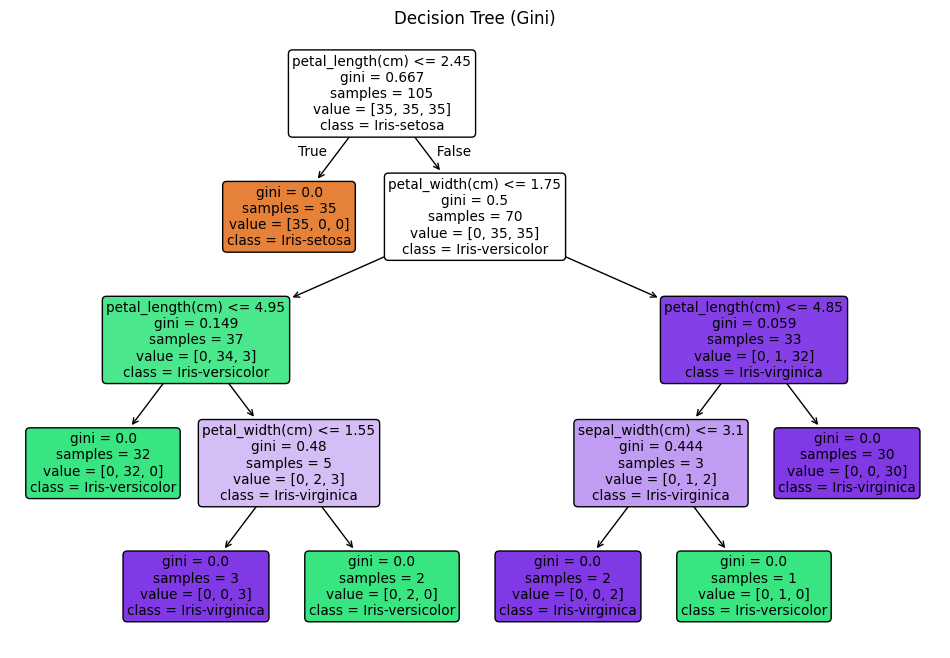

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

y_pred_g = clf_gini.predict(X_test)

acc_g = accuracy_score(y_test, y_pred_g)
prec_g = precision_score(y_test, y_pred_g, average='weighted')
rec_g = recall_score(y_test, y_pred_g, average='weighted')
f1_g = f1_score(y_test, y_pred_g, average='weighted')
cm_g = confusion_matrix(y_test, y_pred_g)

print(f"Accuracy      : {acc_g:.2f}")
print(f"Precision     : {prec_g:.2f}")
print(f"Recall        : {rec_g:.2f}")
print(f"F1 Score      : {f1_g:.2f}")
print("Confusion Matrix:\n", cm_g)

plt.figure(figsize=(12,8))
plot_tree(clf_gini, feature_names=df_shuffled.columns[:-1], class_names=class_names,
          filled=True, rounded=True)
plt.title("Decision Tree (Gini)")
plt.show()

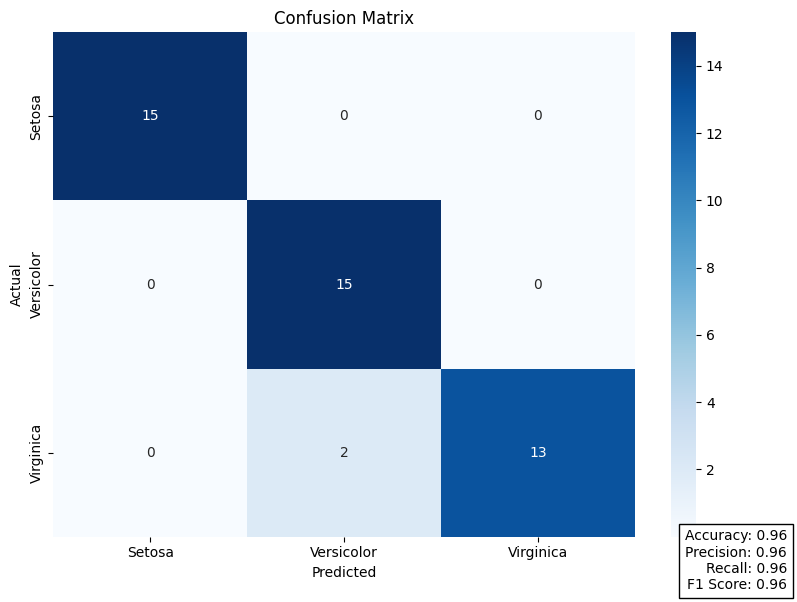

In [ ]:
# Plot with seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_g, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Setosa', 'Versicolor', 'Virginica'],
            yticklabels=['Setosa', 'Versicolor', 'Virginica'])

# Labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Add metrics text below the plot
plt.figtext(0.99, 0.01, f'Accuracy: {acc_g:.2f}\nPrecision: {prec_g:.2f}\nRecall: {rec_g:.2f}\nF1 Score: {f1_g:.2f}',
            horizontalalignment='right', fontsize=10, bbox=dict(facecolor='white', edgecolor='black'))

plt.tight_layout()
plt.show()

##Decision Tree (Entropy)- Accuracy, Precision, Recall, F-score, confusion matrix

Accuracy      : 0.96
Precision     : 0.96
Recall        : 0.96
F1 Score      : 0.96
Confusion Matrix:
 [[15  0  0]
 [ 0 15  0]
 [ 0  2 13]]


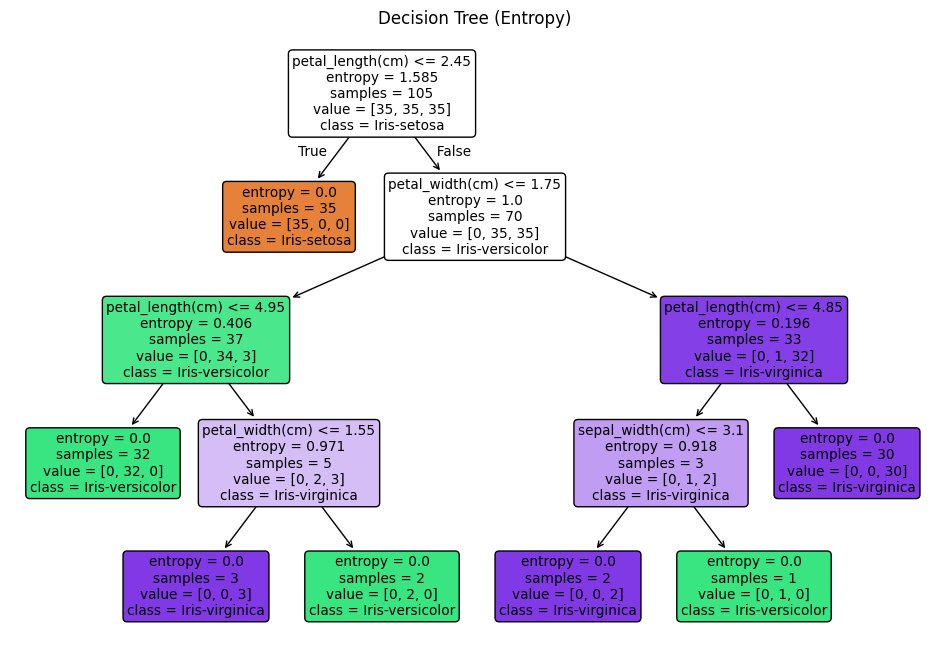

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

y_pred_e = clf_entropy.predict(X_test)

acc_e = accuracy_score(y_test, y_pred_e)
prec_e = precision_score(y_test, y_pred_e, average='weighted')
rec_e = recall_score(y_test, y_pred_e, average='weighted')
f1_e = f1_score(y_test, y_pred_e, average='weighted')
cm_e = confusion_matrix(y_test, y_pred_e)

print(f"Accuracy      : {acc_e:.2f}")
print(f"Precision     : {prec_e:.2f}")
print(f"Recall        : {rec_e:.2f}")
print(f"F1 Score      : {f1_e:.2f}")
print("Confusion Matrix:\n", cm_e)

plt.figure(figsize=(12,8))
plot_tree(clf_entropy, feature_names=df_shuffled.columns[:-1], class_names=class_names,
          filled=True, rounded=True)
plt.title("Decision Tree (Entropy)")
plt.show()

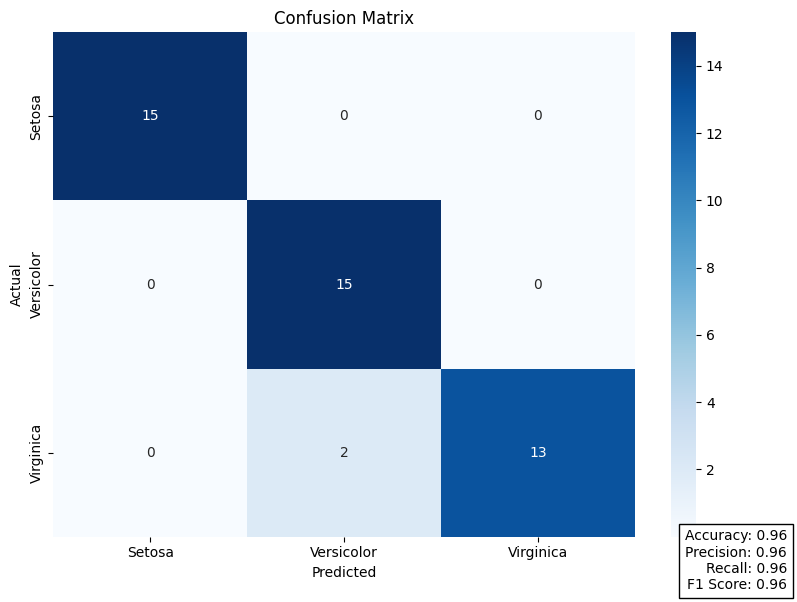

In [ ]:
# Plot with seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_e, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Setosa', 'Versicolor', 'Virginica'],
            yticklabels=['Setosa', 'Versicolor', 'Virginica'])

# Labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Add metrics text below the plot
plt.figtext(0.99, 0.01, f'Accuracy: {acc_e:.2f}\nPrecision: {prec_e:.2f}\nRecall: {rec_e:.2f}\nF1 Score: {f1_e:.2f}',
            horizontalalignment='right', fontsize=10, bbox=dict(facecolor='white', edgecolor='black'))

plt.tight_layout()
plt.show()